In [1]:
import numpy as np

d=15

crosshair = np.zeros((4200,4200))
for i in range(0,4):
    for j in range(0,4):
        crosshair[-d+404+1130*i:d+404+1130*i, -d+527+1049*j:d+527+1049*j] = 10

d=10

def lineout(array, w1, w2):
    width = np.shape(array)[0]
    length = np.shape(array)[1]
    line_data = array[w2,:]
    for i in range(length):
        line_data[i] = (1/(w2+1-w1))*np.sum(array[w1:w2+1,i])
    return line_data

crosshair[-d+504+404+1130*0:d+504+404+1130*0,:] = 4
  
crosshair[-d-504+404+1130*1:d-504+404+1130*1,:] = 4

crosshair[-d+504+404+1130*1:d+504+404+1130*1,:] = 4
  
crosshair[-d-504+404+1130*2:d-504+404+1130*2,:] = 4

crosshair[-d+504+404+1130*2:d+504+404+1130*2,:] = 4
  
crosshair[-d-504+404+1130*3:d-504+404+1130*3,:] = 4

crosshair[-d+504+404+1130*3:d+504+404+1130*3,:] = 4
  
crosshair[-d-504+404+1130*4:d-504+404+1130*4,:] = 4



crosshair[-d+438+404+1130*0:d+438+404+1130*0,:] = 6
  
crosshair[-d-438+404+1130*1:d-438+404+1130*1,:] = 6

crosshair[-d+438+404+1130*1:d+438+404+1130*1,:] = 6
  
crosshair[-d-438+404+1130*2:d-438+404+1130*2,:] = 6

crosshair[-d+438+404+1130*2:d+438+404+1130*2,:] = 6
  
crosshair[-d-438+404+1130*3:d-438+404+1130*3,:] = 6

crosshair[-d+438+404+1130*3:d+438+404+1130*3,:] = 6
  
crosshair[-d-438+404+1130*4:d-438+404+1130*4,:] = 6

items in the base directory: [('ATTRIBUTES', <HDF5 group "/ATTRIBUTES" (13 members)>), ('METADATA_CATEGORIES', <HDF5 group "/METADATA_CATEGORIES" (1 members)>), ('URN', <HDF5 dataset "URN": shape (1,), type "|S61">)]
items in the ATTRIBUTES directory: [('ATTENUATION_CCD', <HDF5 dataset "ATTENUATION_CCD": shape (1,), type "<i8">), ('BINNING', <HDF5 dataset "BINNING": shape (1,), type "|S3">), ('CAMERA_TEMPERATURE_WF', <HDF5 group "/ATTRIBUTES/CAMERA_TEMPERATURE_WF" (1 members)>), ('DATA_BIT_PRECISION', <HDF5 dataset "DATA_BIT_PRECISION": shape (1,), type "<i4">), ('PRESHOT_IMAGESPRESHOT_IMAGES', <HDF5 group "/ATTRIBUTES/PRESHOT_IMAGESPRESHOT_IMAGES" (1 members)>), ('PRESHOT_IMAGES_DTTM', <HDF5 dataset "PRESHOT_IMAGES_DTTM": shape (1,), type "<i8">), ('PRE_SETTINGS_SIGNATURES', <HDF5 dataset "PRE_SETTINGS_SIGNATURES": shape (1,), type "<i8">), ('SHOT_IMAGE', <HDF5 group "/ATTRIBUTES/SHOT_IMAGE" (1 members)>), ('SHOT_IMAGE_DTTM', <HDF5 dataset "SHOT_IMAGE_DTTM": shape (1,), type "<i8">), 

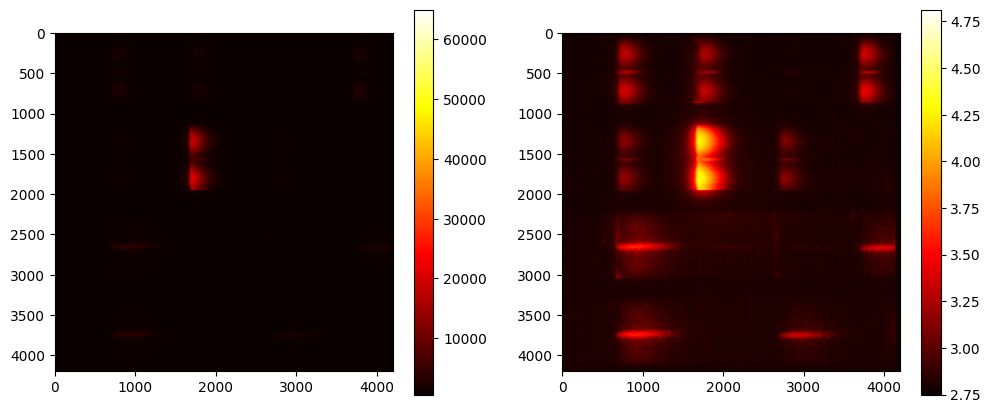

In [2]:
import h5py
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tifffile import imsave

with h5py.File('GXD_IMAGE_TEST.h5', "r") as f:

    base_items = list(f.items())
    print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/SHOT_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    print('items in the SHOT_IMAGE directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    print('items in the SHOT_IMAGE directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    print(type(shot_data))

    data_label = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/DATA_LABEL')
    data_label = np.array(data_label)
    print(type(data_label))

    x_axis = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    x_label = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_LABEL')
    x_label = np.array(x_label)
    print(type(x_label))

    data_units = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/DATA_UNITS')
    data_units = np.array(data_units)
    print(type(data_units))
    print(data_units)

    title = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/TITLE')
    title = np.array(title)
    print(type(title))

    x_units = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_UNITS')
    x_units = np.array(x_units)
    print(type(x_units))
    print(x_units)

    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    im1 = axs[0].imshow(shot_data, cmap='hot')
    axs[0].set_xlabel('')
    axs[0].set_ylabel('')
    axs[0].set_title('')
    plt.colorbar(im1, ax=axs[0], label='')

    im2 = axs[1].imshow((1/np.log(10))*np.log(shot_data), cmap='hot')
    axs[1].set_xlabel('')
    axs[1].set_ylabel('')
    axs[1].set_title('')
    plt.colorbar(im2, ax=axs[1], label='')

# Save the array as a TIFF file
#imsave('output.tiff', shot_data)


items in the base directory: [('ATTRIBUTES', <HDF5 group "/ATTRIBUTES" (13 members)>), ('METADATA_CATEGORIES', <HDF5 group "/METADATA_CATEGORIES" (1 members)>), ('URN', <HDF5 dataset "URN": shape (1,), type "|S61">)]
items in the ATTRIBUTES directory: [('ATTENUATION_CCD', <HDF5 dataset "ATTENUATION_CCD": shape (1,), type "<i8">), ('BINNING', <HDF5 dataset "BINNING": shape (1,), type "|S3">), ('CAMERA_TEMPERATURE_WF', <HDF5 group "/ATTRIBUTES/CAMERA_TEMPERATURE_WF" (1 members)>), ('DATA_BIT_PRECISION', <HDF5 dataset "DATA_BIT_PRECISION": shape (1,), type "<i4">), ('PRESHOT_IMAGESPRESHOT_IMAGES', <HDF5 group "/ATTRIBUTES/PRESHOT_IMAGESPRESHOT_IMAGES" (1 members)>), ('PRESHOT_IMAGES_DTTM', <HDF5 dataset "PRESHOT_IMAGES_DTTM": shape (1,), type "<i8">), ('PRE_SETTINGS_SIGNATURES', <HDF5 dataset "PRE_SETTINGS_SIGNATURES": shape (1,), type "<i8">), ('SHOT_IMAGE', <HDF5 group "/ATTRIBUTES/SHOT_IMAGE" (1 members)>), ('SHOT_IMAGE_DTTM', <HDF5 dataset "SHOT_IMAGE_DTTM": shape (1,), type "<i8">), 

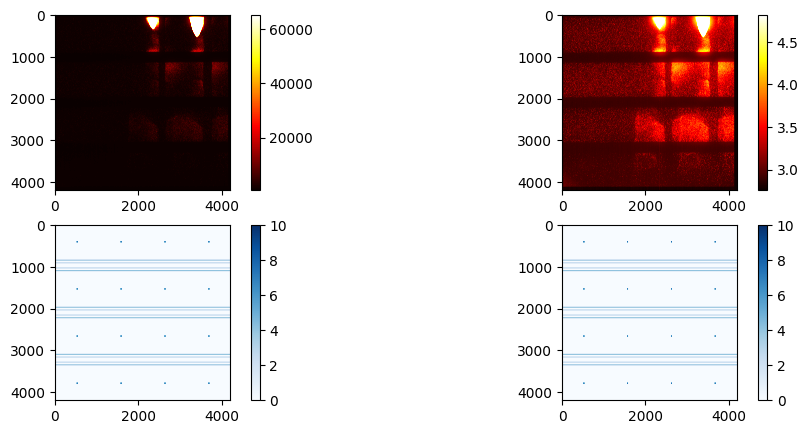

In [3]:
import h5py
import numpy as np
import cv2
from tifffile import imwrite

with h5py.File('GXD_IMAGE_28.h5', "r") as f:

    base_items = list(f.items())
    print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/SHOT_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    print('items in the SHOT_IMAGE directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    print('items in the SHOT_IMAGE directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    print(type(shot_data))
    print(np.shape(shot_data))

    data_label = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/DATA_LABEL')
    data_label = np.array(data_label)
    print(type(data_label))

    x_axis = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    x_label = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_LABEL')
    x_label = np.array(x_label)
    print(type(x_label))

    data_units = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/DATA_UNITS')
    data_units = np.array(data_units)
    print(type(data_units))
    print(data_units)

    title = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/TITLE')
    title = np.array(title)
    print(type(title))

    x_units = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_UNITS')
    x_units = np.array(x_units)
    print(type(x_units))
    print(x_units)

    import matplotlib.pyplot as plt

    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 5))

    j = 1

    im_plot = shot_data[1050*(j-1):1050*j,:]

    #shot_data[1050*(j-1):1050*j,:] = 0.1*shot_data[1050*(j-1):1050*j,:]

    #shot_data = 0.33*shot_data

    #im1 = axs[0].imshow(im_plot, cmap='hot', origin='lower', vmin=0, vmax=80000)
    im1 = axs[0,0].imshow(shot_data, cmap='hot')
    axs[0,0].set_xlabel('')
    axs[0,0].set_ylabel('')
    axs[0,0].set_title('')
    plt.colorbar(im1, ax=axs[0,0], label='')

    #im2 = axs[1].imshow(np.log(im_plot), cmap='hot', origin='lower', vmin=6, vmax=12)
    im2 = axs[0,1].imshow((1/np.log(10))*np.log(shot_data), cmap='hot')
    axs[0,1].set_xlabel('')
    axs[0,1].set_ylabel('')
    axs[0,1].set_title('')
    plt.colorbar(im2, ax=axs[0,1], label='')



im3 = axs[1,0].imshow(crosshair, cmap = 'Blues')
axs[1,0].set_xlabel('')
axs[1,0].set_ylabel('')
axs[1,0].set_title('')
plt.colorbar(im3, ax=axs[1,0], label='')

im4 = axs[1,1].imshow(crosshair, cmap = 'Blues')
axs[1,1].set_xlabel('')
axs[1,1].set_ylabel('')
axs[1,1].set_title('')
plt.colorbar(im4, ax=axs[1,1], label='')

# Save the array as a TIFF file
#imwrite('output.tiff', np.log(shot_data))

(4200,)


C:\Users\rayne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\rayne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-200.0, 2400.0)

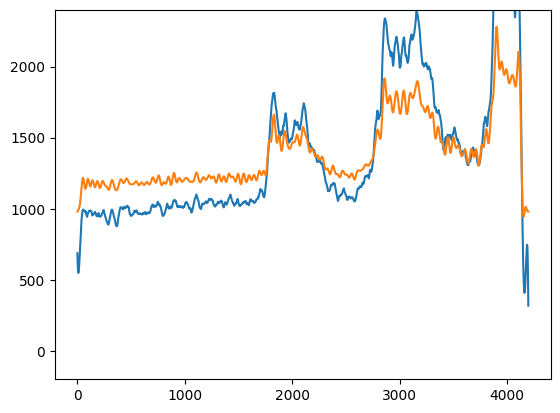

In [4]:
#def lineout(array, w1, w2):
#    width = np.shape(array)[0]
#    length = np.shape(array)[1]
#    line_data = array[w2,:]
#    for i in range(w1,w2):
#        line_data = np.add(line_data,array[i,:])
#    line_data = (1/(w2+1-w1))*line_data
#    return line_data
import scipy

line = lineout(shot_data, 2200, 2500)

xaxis = np.linspace(0,4200,4200)

line_filtered = scipy.signal.savgol_filter(line, 121, 5)

#plt.plot(line)
plt.plot(line_filtered)
#plt.ylim([500,2000])
#plt.plot(line[4100:])
#plt.plot(line[4150:])

from scipy.fft import fft, fftfreq, ifft

FT = fft(line,4200)
print(np.shape(FT))
FT[100:]=0
plt.plot(ifft(FT))
plt.ylim([-200, 2400])
#plt.plot(FT)

In [5]:
import ipywidgets as widgets

xaxis = np.linspace(0,4200,4200)

@widgets.interact(center=(100, 4100, 20), width=(0, 500, 5))
def update(center = 100, width = 5):
    line = lineout(shot_data, center-width, center+width)
    line_filtered = scipy.signal.savgol_filter(line, 121, 5)
    plt.plot(xaxis, line_filtered, color='C0')
    plt.ylim([500, 2400])

interactive(children=(IntSlider(value=100, description='center', max=4100, min=100, step=20), IntSlider(value=…

In [ ]:
import ipywidgets as widgets

xaxis = np.linspace(0,4200,4200)

@widgets.interact(center=(100, 4100, 20), width=(0, 500, 5))
def update(center = 100, width = 5):
    line = lineout(shot_data, center-width, center+width)
    line_filtered = scipy.signal.savgol_filter(line, 121, 5)

    fig, axs = plt.subplots(1, 2, figsize=(16, 5))

    im1 = axs[0].plot(xaxis, line_filtered, color='C0')
    axs[0].set_ylim([500, 2400])

    d=2

    img = np.zeros(np.shape(shot_data))

    img[center-width-d:center-width,:] = 100000
    img[center+width:center+width+d,:] = 100000

    im2 = axs[1].imshow((1/np.log(10))*np.log(img+shot_data), cmap='hot')
    axs[1].set_xlabel('')
    axs[1].set_ylabel('')
    axs[1].set_title('')
    plt.colorbar(im2, ax=axs[1], label='')
    plt.show()


    

interactive(children=(IntSlider(value=100, description='center', max=4100, min=100, step=20), IntSlider(value=…

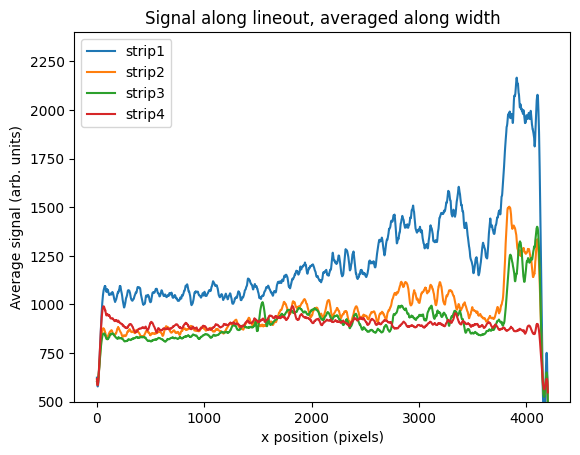

In [43]:
center1 = 600
width1 = 250

center2 = 1720
width2 = 250

center3 = 2820
width3 = 200

center4 = 3840
width4 = 250

line1 = lineout(shot_data, center1-width1, center1+width1)
line_filtered1 = scipy.signal.savgol_filter(line1, 121, 5)

line2 = lineout(shot_data, 1720-250, 1720+250)
line_filtered2 = scipy.signal.savgol_filter(line2, 121, 5)

line3 = lineout(shot_data, center3-width3, center3+width3)
line_filtered3 = scipy.signal.savgol_filter(line3, 121, 5)

line4 = lineout(shot_data, center4-width4, center4+width4)
line_filtered4 = scipy.signal.savgol_filter(line4, 121, 5)

plt.plot(xaxis, line_filtered1, label = 'strip1')
plt.plot(xaxis, line_filtered2, label = 'strip2')
plt.plot(xaxis, line_filtered3, label = 'strip3')
plt.plot(xaxis, line_filtered4, label = 'strip4')
plt.ylim([500, 2400])
plt.xlabel('x position (pixels)')
plt.ylabel('Average signal (arb. units)')
plt.title('Signal along lineout, averaged along width')
plt.legend()

plt.show()


In [ ]:
center = 3840
width = 250

line = lineout(shot_data, center-width, center+width)
line_filtered = scipy.signal.savgol_filter(line, 121, 5)

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

im1 = axs[0].plot(xaxis, line_filtered, color='C0')
axs[0].set_ylim([500, 2400])
axs[0].set_xlabel('x position (pixels)')
axs[0].set_ylabel('Average signal (arb. units)')
axs[0].set_title('Signal along lineout, averaged along width')

items in the base directory: [('ATTRIBUTES', <HDF5 group "/ATTRIBUTES" (13 members)>), ('METADATA_CATEGORIES', <HDF5 group "/METADATA_CATEGORIES" (1 members)>), ('URN', <HDF5 dataset "URN": shape (1,), type "|S61">)]
items in the ATTRIBUTES directory: [('ATTENUATION_CCD', <HDF5 dataset "ATTENUATION_CCD": shape (1,), type "<i8">), ('BINNING', <HDF5 dataset "BINNING": shape (1,), type "|S3">), ('CAMERA_TEMPERATURE_WF', <HDF5 group "/ATTRIBUTES/CAMERA_TEMPERATURE_WF" (1 members)>), ('DATA_BIT_PRECISION', <HDF5 dataset "DATA_BIT_PRECISION": shape (1,), type "<i4">), ('PRESHOT_IMAGESPRESHOT_IMAGES', <HDF5 group "/ATTRIBUTES/PRESHOT_IMAGESPRESHOT_IMAGES" (1 members)>), ('PRESHOT_IMAGES_DTTM', <HDF5 dataset "PRESHOT_IMAGES_DTTM": shape (1,), type "<i8">), ('PRE_SETTINGS_SIGNATURES', <HDF5 dataset "PRE_SETTINGS_SIGNATURES": shape (1,), type "<i8">), ('SHOT_IMAGE', <HDF5 group "/ATTRIBUTES/SHOT_IMAGE" (1 members)>), ('SHOT_IMAGE_DTTM', <HDF5 dataset "SHOT_IMAGE_DTTM": shape (1,), type "<i8">), 

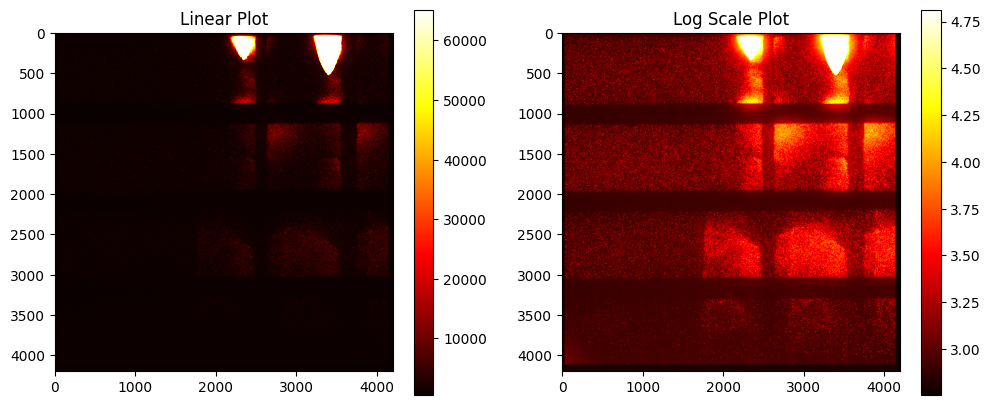

In [2]:
import h5py
import numpy as np
import cv2

with h5py.File('GXD_IMAGE_28.h5', "r") as f:

    base_items = list(f.items())
    print('items in the base directory:', base_items)

    attributes = f.get('/ATTRIBUTES')
    attributes_list = list(attributes.items())
    print('items in the ATTRIBUTES directory:', attributes_list)

    shot_image_folder = f.get('/ATTRIBUTES/SHOT_IMAGE')
    shot_image_list = list(shot_image_folder.items())
    print('items in the SHOT_IMAGE directory:', shot_image_list)

    shot_data_folder = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA')
    shot_data_list = list(shot_data_folder.items())
    print('items in the SHOT_IMAGE directory:', shot_data_list)

    shot_data = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/DATA')
    shot_data = np.array(shot_data)
    print(type(shot_data))

    data_label = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/DATA_LABEL')
    data_label = np.array(data_label)
    print(type(data_label))

    x_axis = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_AXIS')
    x_axis = np.array(x_axis)
    print(type(x_axis))

    y_axis = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/Y_AXIS')
    y_axis = np.array(y_axis)
    print(type(y_axis))

    x_label = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_LABEL')
    x_label = np.array(x_label)
    print(type(x_label))

    data_units = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/DATA_UNITS')
    data_units = np.array(data_units)
    print(type(data_units))
    print(data_units)

    title = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/TITLE')
    title = np.array(title)
    print(type(title))

    x_units = f.get('/ATTRIBUTES/SHOT_IMAGE/DATA/X_UNITS')
    x_units = np.array(x_units)
    print(type(x_units))
    print(x_units)

    import matplotlib.pyplot as plt

    extent = (np.min(x_axis),np.max(x_axis),np.min(y_axis),np.max(y_axis))
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    j = 1

    im_plot = shot_data[1050*(j-1):1050*j,:]

    #shot_data[1050*(j-1):1050*j,:] = 0.1*shot_data[1050*(j-1):1050*j,:]

    #shot_data = 0.33*shot_data

    #im1 = axs[0].imshow(im_plot, cmap='hot', origin='lower', vmin=0, vmax=80000)
    im1 = axs[0].imshow(shot_data, cmap='hot')
    axs[0].set_xlabel('')
    axs[0].set_ylabel('')
    axs[0].set_title('Linear Plot')
    plt.colorbar(im1, ax=axs[0], label='')

    #im2 = axs[1].imshow(np.log(im_plot), cmap='hot', origin='lower', vmin=6, vmax=12)
    im2 = axs[1].imshow((1/np.log(10))*np.log(shot_data), cmap='hot')
    axs[1].set_xlabel('')
    axs[1].set_ylabel('')
    axs[1].set_title('Log Scale Plot')
    plt.colorbar(im2, ax=axs[1], label='')


